			************* PLEASE WAIT **************

total word vectors for the given article:  188240
vector ready

length of the sentences  53
similarity length and content 53
matrix ready

wait for the graph

Name: 
Type: Graph
Number of nodes: 53
Number of edges: 1275
Average degree:  48.1132


TextRank algorithm Run time : 0.085970  seconds


How many lines You want to display the Summary?  :20


=================this is your Summarized document=============== 


ರಿಲಾಯನ್ಸ್ ಜಿಯೋದಿಂದ ಗ್ರಾಹಕರಿಗೆ ಭರ್ಜರಿ ಹೊಸ ವರ್ಷದ ಗಿಫ್ಟ್
ಇನ್‌ಸ್ಟಾಗ್ರಾಮ್‌ನಲ್ಲಿ ಅಪಹಾಸ್ಯ ವೀಡಿಯೊ ಹಾಕಿ ಜೈಲು ಸೇರಿದ ಯುವಕ ಜಗತ್ತಿಗೆ ಬರುತ್ತಿದ್ದಾನೆ ಮತ್ತೊಬ್ಬ ಹೊಸ ದೇವರು.. ನಿಂತಲ್ಲೇ ಸಿಗುತ್ತೆ ವರ..!
ಏರ್​ಟೆಲ್​ ದೀಪಾವಳಿ ಧಮಾಕಾ: 90 ದಿನಗಳವರೆಗೆ ಅನಿಯಮಿತ ಕರೆ ಮತ್ತು ಉಚಿತ ಡೇಟಾ ಪಡೆಯಿರಿ..!
ಶೀಘ್ರದಲ್ಲೇ ಭಾರತದ ಇಂಟರ್ನೆಟ್​ಗೆ ಹೊಸ ವೇಗ ನೀಡಲಿದೆ ಇಸ್ರೋ ಸಂಸ್ಥೆ
ರೈಲು ಪ್ರಯಾಣಿಕರ ಗಮನಕ್ಕೆ: ಇನ್ಮುಂದೆ ಮೊಬೈಲ್​ನಲ್ಲೇ ಜನರಲ್ ಟಿಕೆಟ್ ಬುಕ್ ಮಾಡಿಕೊಳ್ಳಬಹುದು
Trending ವಿಭಾಗವನ್ನೇ ಕಿತ್ತೆಸೆದ Facebook ಈ ಆರು ಆ್ಯಪ್​ಗಳು ವಾಟ್ಸ್​ಆ್ಯಪ್​, ಫೇಸ್​ಬುಕ್​ನಿಂದ ನಿಮ್ಮ ಮಾಹಿತಿ ಕದಿಯುತ್ತಿವೆ; ಅವುಗಳನ್ನು ಈಗಲೇ ಡಿಲೀಟ್​ ಮಾಡಿ
A

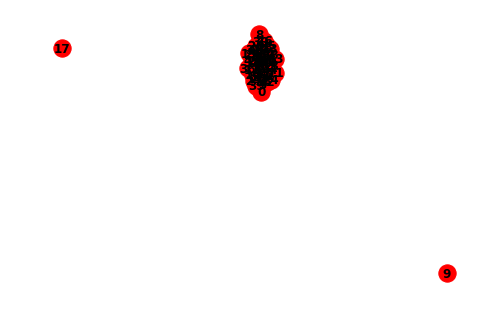

In [25]:
import codecs
from numpy import asarray, zeros
import pandas as pd
from os import path
from time import time
from nltk.tokenize import sent_tokenize,word_tokenize
import string
import re
from heapq import nlargest
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import nltk
import nltk
from rouge import  Rouge
import warnings
import json
warnings.filterwarnings('ignore')

sentences = []
print("\t\t\t************* PLEASE WAIT **************\n")
file = open("test3.txt","r", encoding='utf-8')
read=file.readlines()
for s in read:
    sentences.append(nltk.tokenize.sent_tokenize(s))
sentences = [y for x in sentences for y in x] # flatten list
clean_sentences = pd.Series(sentences).str.replace("[.!?\\-]", " ")
clean_sentences = [s.lower() for s in clean_sentences]
clean_sentences = [s.strip() for s in clean_sentences]

#file_path = path.relpath("C:/Users/RAVIKUMAR/Desktop/SEM 8/Porject/Ravi/kannada_stopwords.txt")

file = open("stop_words.txt", encoding="utf8")
stop_words=file.read()

def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]


# creating word emmbedings
#file_path2 = path.relpath("C:/Users/RAVIKUMAR/Desktop/SEM 8/Porject/wiki.kn - Copy.txt")
file_path2= path.relpath("C:/Users/RAVIKUMAR/Desktop/NLP/wiki.kn.vec")
word_embeddings = {}
f = open(file_path2, encoding='utf-8')
for line in f:
    values =line.strip().split()
    word = values[0]
    coefs = asarray(values[2:], dtype='float32')
    word_embeddings[word] = coefs
f.close()
print("total word vectors for the given article: ",len(word_embeddings))


#sentense vectors creating
sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        vector = sum(word_embeddings.get(w, np.zeros((299,))) for w in i.split()) / (len(i.split()) + 0.001)
#         print("this is vector for this sentence",i,vector,"length of the sentence",len(vector),"\n")
#         #print([word_embeddings.get(w,np.zeros(299,)) for w in i.split()])
#         print("\n")
    else:
        vector = np.zeros((299,))
    sentence_vectors.append(vector)
print("vector ready\n")


  # similarity matrix
#print("len of the sentense vector",len(sentence_vectors))
similarity_matrix = np.zeros([len(sentences), len(sentences)])
print("length of the sentences ",len(sentences))
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            similarity_matrix[i][j] = cosine_similarity(sentence_vectors[i].reshape(1, 299), sentence_vectors[j].reshape(1, 299))[0, 0]
print("similarity length and content",len(similarity_matrix))
print("matrix ready\n")

#plot
import matplotlib.pyplot as plt
nx_graph = nx.from_numpy_array(similarity_matrix)

print("wait for the graph\n")
print(nx.info(nx_graph))
nx.draw(nx_graph,with_labels=True,font_weight='bold')
plt.savefig("filename1.png")

t1 = time()
scores = nx.pagerank(nx_graph)
t2 = time()
print("\n")
# for i in range(len(sentences)):
#     print(sentences[i],"---->",scores[i],"\n","\n")
#print("Rank and score of the sentence from the scores dict:\n", scores)
ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)

print("TextRank algorithm Run time : %f " % (t2 - t1), "seconds")

# Extract top  sentences as the summary
#while(True):
how_many = int(input("\n\nHow many lines You want to display the Summary?  :"))
print("\n\n=================this is your Summarized document=============== \n\n")
Summarizesummarized_data = []
for i in range(how_many):
    print(ranked_sentences[i][1])
    Summarizesummarized_data.append(ranked_sentences[i][1])
print("\n\n=================this is your original document=============== \n\n")
original = pd.DataFrame(sentences)
reference = []
# for i in sentences:
#     reference.append(i)

In [26]:
lines =[]
for i in Summarizesummarized_data:
    lines.append(i)
    lines.append("\n")   
refer_file = open("OurRef.txt","r", encoding='utf-8')
refer_data= refer_file.read()



output_file = open("OurOutput.txt", "w+", encoding='utf-8')
output_file1=output_file.writelines(i for i in lines)
output_file.close()
output_file5 = open("OurOutput.txt", "r", encoding='utf-8')
out_data =  output_file5.read()




total_words_system = nltk.word_tokenize(out_data)

total_words_reference = nltk.word_tokenize(refer_data)


print("total_words_system\n",total_words_system)
print("\n")


total_words_system
 ['ರಿಲಾಯನ್ಸ್', 'ಜಿಯೋದಿಂದ', 'ಗ್ರಾಹಕರಿಗೆ', 'ಭರ್ಜರಿ', 'ಹೊಸ', 'ವರ್ಷದ', 'ಗಿಫ್ಟ್', 'ಇನ್\u200cಸ್ಟಾಗ್ರಾಮ್\u200cನಲ್ಲಿ', 'ಅಪಹಾಸ್ಯ', 'ವೀಡಿಯೊ', 'ಹಾಕಿ', 'ಜೈಲು', 'ಸೇರಿದ', 'ಯುವಕ', 'ಜಗತ್ತಿಗೆ', 'ಬರುತ್ತಿದ್ದಾನೆ', 'ಮತ್ತೊಬ್ಬ', 'ಹೊಸ', 'ದೇವರು..', 'ನಿಂತಲ್ಲೇ', 'ಸಿಗುತ್ತೆ', 'ವರ..', '!', 'ಏರ್\u200bಟೆಲ್\u200b', 'ದೀಪಾವಳಿ', 'ಧಮಾಕಾ', ':', '90', 'ದಿನಗಳವರೆಗೆ', 'ಅನಿಯಮಿತ', 'ಕರೆ', 'ಮತ್ತು', 'ಉಚಿತ', 'ಡೇಟಾ', 'ಪಡೆಯಿರಿ..', '!', 'ಶೀಘ್ರದಲ್ಲೇ', 'ಭಾರತದ', 'ಇಂಟರ್ನೆಟ್\u200bಗೆ', 'ಹೊಸ', 'ವೇಗ', 'ನೀಡಲಿದೆ', 'ಇಸ್ರೋ', 'ಸಂಸ್ಥೆ', 'ರೈಲು', 'ಪ್ರಯಾಣಿಕರ', 'ಗಮನಕ್ಕೆ', ':', 'ಇನ್ಮುಂದೆ', 'ಮೊಬೈಲ್\u200bನಲ್ಲೇ', 'ಜನರಲ್', 'ಟಿಕೆಟ್', 'ಬುಕ್', 'ಮಾಡಿಕೊಳ್ಳಬಹುದು', 'Trending', 'ವಿಭಾಗವನ್ನೇ', 'ಕಿತ್ತೆಸೆದ', 'Facebook', 'ಈ', 'ಆರು', 'ಆ್ಯಪ್\u200bಗಳು', 'ವಾಟ್ಸ್\u200bಆ್ಯಪ್\u200b', ',', 'ಫೇಸ್\u200bಬುಕ್\u200bನಿಂದ', 'ನಿಮ್ಮ', 'ಮಾಹಿತಿ', 'ಕದಿಯುತ್ತಿವೆ', ';', 'ಅವುಗಳನ್ನು', 'ಈಗಲೇ', 'ಡಿಲೀಟ್\u200b', 'ಮಾಡಿ', 'ATM', 'ವಂಚನೆಯಿಂದ', 'ಪಾರಾಗಲು', 'SBI', 'ಬ್ಯಾಂಕ್', 'ನೀಡುತ್ತಿದೆ', 'ಉಚಿತ', 'ಡೆಬಿಟ್', 'ಕಾರ್ಡ್\u200b', 'ಐಡಿಯಾ', 'ನೀಡಲಿದೆ', '30', 'ಜಿಬಿ', 'ಇಂಟರ್\u200bನೆಟ್\u200bಮಾರುಕಟ್ಟೆಗ

In [27]:
print("total_words_reference\n",total_words_reference)

total_words_reference
 ['ಕನ್ನಡದಲ್ಲೂ', 'ಇನ್ಮುಂದೆ', 'ಸುಲಭವಾಗಿ', 'ಚಾಟ್\u200b', 'ಮಾಡಬಹುದು', 'ಇನ್\u200cಸ್ಟಾಗ್ರಾಮ್\u200cನಲ್ಲಿ', 'ಅಪಹಾಸ್ಯ', 'ವೀಡಿಯೊ', 'ಹಾಕಿ', 'ಜೈಲು', 'ಸೇರಿದ', 'ಯುವಕ', 'ಜಗತ್ತಿಗೆ', 'ಬರುತ್ತಿದ್ದಾನೆ', 'ಮತ್ತೊಬ್ಬ', 'ಹೊಸ', 'ದೇವರು..', 'ನಿಂತಲ್ಲೇ', 'ಸಿಗುತ್ತೆ', 'ವರ..', '!', 'ಏರ್\u200bಟೆಲ್\u200b', 'ದೀಪಾವಳಿ', 'ಧಮಾಕಾ', ':', '90', 'ದಿನಗಳವರೆಗೆ', 'ಅನಿಯಮಿತ', 'ಕರೆ', 'ಮತ್ತು', 'ಉಚಿತ', 'ಡೇಟಾ', 'ಪಡೆಯಿರಿ..', '!', 'ಐಡಿಯಾ', 'ನೀಡಲಿದೆ', '30', 'ಜಿಬಿ', 'ಇಂಟರ್\u200bನೆಟ್\u200bಮಾರುಕಟ್ಟೆಗೆ', 'ಅಪ್ಪಳಿಸಲಿದೆ', 'ಮರ್ಸಿಡಸ್', 'ಎಸ್', 'ಶ್ರೇಣಿಯ', 'ಹೊಸ', 'ಕಾರ್', 'ಕೇವಲ', '9', 'ರೂಪಾಯಿಗಳಿಗೆ', 'ಅನಿಯಮಿತ', 'ಕರೆ', ',', 'SMS', 'ಕೂಡಾ', 'ಫ್ರೀ', 'ಆ್ಯಪಲ್', 'ಹೊಸ', 'ಇತಿಹಾಸ', '–', 'ಒಂದು', 'ಟ್ರಿಲಿಯನ್', 'ಡಾಲರ್', 'ಮುಟ್ಟಿದ', 'ವಿಶ್ವದ', 'ಮೊದಲ', 'ಕಂಪನಿ', 'ಒಂದುಗೂಡಿವೆ', 'ಜಿಯೋ', 'ಮ್ಯೂಸಿಕ್', '-', 'ಸಾವನ್', ':', 'ಕಲಾವಿದರಿಗಾಗಿ', 'ದಕ್ಷಿಣ', 'ಏಷ್ಯಾದಲ್ಲೇ', 'ಅತಿದೊಡ್ಡ', 'ವೇದಿಕೆ', 'ಸೃಷ್ಟಿ', 'ಹೂಡಿಕೆ', 'ಮಾಡಿದರೂ', 'ಸಿಗುತ್ತೆ', 'ಅತ್ಯುತ್ತಮ', 'ಬಡ್ಡಿದರ', 'ವಾಟ್ಸ್\u200bಆ್ಯಪ್\u200b', 'ಮೇಲೆ', 'ನಿಗಾವಹಿಸಲಿದೆ', 'ಪೊಲೀಸ್', 'ಇಲಾಖೆ..', '!', '5', 'ಸ್ಟಾರ್\u200b', 'ಗಿಟ್ಟಿಸಿಕೊಂಡ',

In [28]:
print("output length:",len(Summarizesummarized_data))
print("input length:",len(sentences))

print("Number of words in system",len(total_words_system))
print("number of words in reference",len(total_words_reference))
# Load summary results
hypotheses = str(Summarizesummarized_data)


references =str(out_data)


rouge = Rouge()
rouge_score= rouge.get_scores(hypotheses, references)
rouge_score

output length: 20
input length: 53
Number of words in system 218
number of words in reference 152


[{'rouge-1': {'f': 0.707920787079208,
   'p': 0.7079207920792079,
   'r': 0.7079207920792079},
  'rouge-2': {'f': 0.5671641741044776,
   'p': 0.5671641791044776,
   'r': 0.5671641791044776},
  'rouge-l': {'f': 0.7115902914962839,
   'p': 0.7058823529411765,
   'r': 0.717391304347826}}]

In [29]:
print(
(
0.6430653396902655

+0.47971827111760046

+0.6355728726602188




)/3
)

0.5861188278226949
